<a href="https://colab.research.google.com/github/gulabpatel/AutoML/blob/main/H2O_AutoML_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* H2O AutoML:
* Table of contents.
* Data support.
* Feature engineering.
* Model training. Parallel model  testing. Model evaluation and final model creation.
* Choosing between AutoML Tables and BigQuery ML.
* Model transparency and Cloud Logging.
* Explainability. 
* Test data export.


In [1]:
#this command might be relevant ony on GPU nodes. But the notebook will run on CPU as well
#If running on CPU remove the command wherever it appears
!nvidia-smi

Tue Oct 20 08:53:10 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
#To run H2O AutoML requires java runtime environment
!apt-get install default-jre
!java -version

Reading package lists... Done
Building dependency tree       
Reading state information... Done
default-jre is already the newest version (2:1.11-68ubuntu1~18.04.1).
default-jre set to manually installed.
0 upgraded, 0 newly installed, 0 to remove and 21 not upgraded.
openjdk version "11.0.8" 2020-07-14
OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1)
OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)


In [3]:
#Install h2o
!pip install h2o

     |████████████████████████████████| 129.4MB 94kB/s 
  Created wheel for h2o: filename=h2o-3.30.1.3-py2.py3-none-any.whl size=129446676 sha256=680bde2c255c13af3c7f032e2c8c65a2847ca7790ea6b638251cec60b7d85ea2
  Stored in directory: /root/.cache/pip/wheels/3d/e6/07/53ce9be9cb61b33a79cb3ed1fc39f2dae84f6ee6fe1e373e5e
Successfully built h2o


In [4]:
 import h2o

In [5]:
#Initialize h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.8" 2020-07-14; OpenJDK Runtime Environment (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.8+10-post-Ubuntu-0ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpxph1cjwj
  JVM stdout: /tmp/tmpxph1cjwj/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpxph1cjwj/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.1.3
H2O_cluster_version_age:,"21 days, 17 hours and 24 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_cbkpz3
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [6]:
from h2o.automl import H2OAutoML

In [7]:
#churn_df = h2o.import_file('https://raw.githubusercontent.com/srivatsan88/YouTubeLI/master/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
churn_df = h2o.import_file("/content/Churn.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [9]:
churn_df

Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.2,528.35,Yes
Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
Male,No,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.2,30.2,Yes


In [10]:
churn_df.types

{'Churn_Label': 'enum',
 'Contract': 'enum',
 'Dependents': 'enum',
 'Device_Protection': 'enum',
 'Gender': 'enum',
 'Internet_Service': 'enum',
 'Monthly_Charges': 'real',
 'Multiple_Lines': 'enum',
 'Online_Backup': 'enum',
 'Online_Security': 'enum',
 'Paperless_Billing': 'enum',
 'Partner': 'enum',
 'Payment_Method': 'enum',
 'Phone_Service': 'enum',
 'Senior_Citizen': 'enum',
 'Streaming_Movies': 'enum',
 'Streaming_TV': 'enum',
 'Tech_Support': 'enum',
 'Tenure_Months': 'int',
 'Total_Charges': 'real'}

In [11]:
churn_df.describe()

Rows:7043
Cols:20




,Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
type,enum,enum,enum,enum,int,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,enum,real,real,enum
mins,,,,,0.0,,,,,,,,,,,,,18.25,18.8,
mean,,,,,32.37114865824223,,,,,,,,,,,,,64.76169246059916,2283.3004408418656,
maxs,,,,,72.0,,,,,,,,,,,,,118.75,8684.8,
sigma,,,,,24.559481023094452,,,,,,,,,,,,,30.090047097678482,2266.771361883145,
zeros,,,,,11,,,,,,,,,,,,,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,0
0,Male,No,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
1,Female,No,No,Yes,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes
2,Female,No,No,Yes,8.0,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes


In [12]:
churn_train,churn_test,churn_valid = churn_df.split_frame(ratios=[.7, .15])

In [13]:
churn_train

Gender,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label
Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.8,3046.05,Yes
Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.7,5036.3,Yes
Female,No,Yes,No,10,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Credit card (automatic),55.2,528.35,Yes
Male,Yes,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
Male,No,Yes,Yes,47,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.35,4749.15,Yes
Male,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,No,Electronic check,30.2,30.2,Yes
Female,No,No,No,17,Yes,No,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Mailed check,64.7,1093.1,Yes
Male,No,No,Yes,34,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,106.35,3549.25,Yes


In [14]:
y = "Churn_Label"
x = churn_df.columns
x.remove(y)

In [17]:
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)

In [18]:
#This is just to see whether GPU is being utilized!
!nvidia-smi

Tue Oct 20 09:01:23 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [19]:
aml.train(x = x, y = y, training_frame = churn_train, validation_frame=churn_valid)

AutoML progress: |
09:01:23.697: Project: AutoML_20201020_90123692
09:01:23.698: Cross-validation disabled by user: no fold column nor nfolds > 1.
09:01:23.699: Setting stopping tolerance adaptively based on the training frame: 0.01432082875315512
09:01:23.699: Build control seed: 10
09:01:23.699: Since cross-validation is disabled, and no leaderboard frame was provided, automatically split the training data into training and leaderboard frames in the ratio 90/10
09:01:23.786: training frame: Frame key: automl_training_py_2_sid_8e46    cols: 20    rows: 4404  chunks: 8    size: 185561  checksum: 1421587068369193328
09:01:23.787: validation frame: Frame key: py_4_sid_8e46    cols: 20    rows: 1104  chunks: 8    size: 83263  checksum: 5832880875792482914
09:01:23.791: leaderboard frame: Frame key: automl_leaderboard_py_2_sid_8e46    cols: 20    rows: 472  chunks: 8    size: 76549  checksum: -7720541563610321463
09:01:23.791: blending frame: NULL
09:01:23.792: response column: Churn_Label

In [20]:
#Again just to see the utilization of GPU
!nvidia-smi

Tue Oct 20 09:01:58 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.23.05    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    26W /  70W |    127MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [21]:
lb = aml.leaderboard

In [22]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GLM_1_AutoML_20201020_090123,0.830569,0.435595,0.610091,0.233898,0.37634,0.141632
GBM_5_AutoML_20201020_090123,0.827817,0.44155,0.620153,0.246169,0.379967,0.144375
GBM_2_AutoML_20201020_090123,0.8255,0.450288,0.621402,0.253739,0.382054,0.145965
DRF_1_AutoML_20201020_090123,0.824915,0.452765,0.607684,0.226351,0.381202,0.145315
XGBoost_3_AutoML_20201020_090123,0.823929,0.461706,0.610556,0.248326,0.385148,0.148339
GBM_1_AutoML_20201020_090123,0.823516,0.45059,0.622331,0.243623,0.382222,0.146093
XGBoost_2_AutoML_20201020_090123,0.820901,0.469034,0.611948,0.257707,0.391398,0.153192
GBM_4_AutoML_20201020_090123,0.820488,0.458843,0.632048,0.239357,0.384851,0.14811
GBM_3_AutoML_20201020_090123,0.818355,0.462416,0.607787,0.24227,0.387664,0.150283
XGBoost_1_AutoML_20201020_090123,0.806439,0.495989,0.59205,0.272135,0.400526,0.160421


In [23]:
#Prediction
churn_pred=aml.leader.predict(churn_test)

glm prediction progress: |████████████████████████████████████████████████| 100%


In [24]:
churn_pred.head()

predict,No,Yes
Yes,0.617169,0.382831
No,0.780593,0.219407
No,0.80075,0.19925
No,0.744904,0.255096
No,0.898151,0.101849
Yes,0.300466,0.699534
Yes,0.563123,0.436877
No,0.723504,0.276496
Yes,0.322257,0.677743
Yes,0.62853,0.37147


In [25]:
aml.leader.model_performance(churn_test)


ModelMetricsBinomialGLM: glm
** Reported on test data. **

MSE: 0.135339227274861
RMSE: 0.3678848016361385
LogLoss: 0.41816394388048317
Null degrees of freedom: 1062
Residual degrees of freedom: 1016
Null deviance: 1213.581423519483
Residual deviance: 889.016544689907
AIC: 983.016544689907
AUC: 0.8393489865208663
AUCPR: 0.6458452583126004
Gini: 0.6786979730417326

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2466313986481698: 


,,No,Yes,Error,Rate
0,No,578.0,211.0,0.2674,(211.0/789.0)
1,Yes,54.0,220.0,0.1971,(54.0/274.0)
2,Total,632.0,431.0,0.2493,(265.0/1063.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.246631,0.624113,234.0
1,max f2,0.145116,0.738153,283.0
2,max f0point5,0.520835,0.639746,123.0
3,max accuracy,0.520835,0.812794,123.0
4,max precision,0.901031,1.000000,0.0
5,max recall,0.007878,1.000000,391.0
6,max specificity,0.901031,1.000000,0.0
7,max absolute_mcc,0.498793,0.478023,133.0
8,max min_per_class_accuracy,0.280751,0.759189,218.0
9,max mean_per_class_accuracy,0.246631,0.767746,234.0



Gains/Lift Table: Avg response rate: 25.78 %, avg score: 25.73 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010348,0.829778,3.174187,3.174187,0.818182,0.858948,0.818182,0.858948,0.032847,0.032847,217.418713,217.418713,0.030312
1,2,0.020696,0.806996,3.174187,3.174187,0.818182,0.816365,0.818182,0.837656,0.032847,0.065693,217.418713,217.418713,0.060624
2,3,0.030103,0.782344,3.879562,3.394617,1.000000,0.794991,0.875000,0.824323,0.036496,0.102190,287.956204,239.461679,0.097120
3,4,0.040452,0.762494,2.821500,3.248005,0.727273,0.770739,0.837209,0.810616,0.029197,0.131387,182.149967,224.800543,0.122515
4,5,0.050800,0.747306,3.174187,3.232968,0.818182,0.754036,0.833333,0.799090,0.032847,0.164234,217.418713,223.296837,0.152827
5,6,0.100659,0.677191,2.488776,2.864350,0.641509,0.713263,0.738318,0.756578,0.124088,0.288321,148.877565,186.434955,0.252833
6,7,0.150517,0.600458,2.415576,2.715693,0.622642,0.638739,0.700000,0.717544,0.120438,0.408759,141.557637,171.569343,0.347923
7,8,0.200376,0.512637,2.269178,2.604589,0.584906,0.557052,0.671362,0.677609,0.113139,0.521898,126.917780,160.458860,0.433178
8,9,0.300094,0.367989,1.463986,2.225579,0.377358,0.436850,0.573668,0.597608,0.145985,0.667883,46.398568,122.557948,0.495513
9,10,0.399812,0.250307,1.244388,1.980859,0.320755,0.307436,0.510588,0.525235,0.124088,0.791971,24.438783,98.085874,0.528346


In [26]:
#Take all the model id to analysis individually
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])
#se = h2o.get_model([mid for mid in model_ids if "StackedEnsemble_AllModels" in mid][0])
#metalearner = h2o.get_model(se.metalearner()['name'])

In [27]:
model_ids

['GLM_1_AutoML_20201020_090123',
 'GBM_5_AutoML_20201020_090123',
 'GBM_2_AutoML_20201020_090123',
 'DRF_1_AutoML_20201020_090123',
 'XGBoost_3_AutoML_20201020_090123',
 'GBM_1_AutoML_20201020_090123',
 'XGBoost_2_AutoML_20201020_090123',
 'GBM_4_AutoML_20201020_090123',
 'GBM_3_AutoML_20201020_090123',
 'XGBoost_1_AutoML_20201020_090123']

In [28]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20201020_090123


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.09399571002559544
RMSE: 0.30658719807845114
LogLoss: 0.29949752998721063
Mean Per-Class Error: 0.1452000631438206
AUC: 0.9305935784005755
AUCPR: 0.8299469678919649
Gini: 0.8611871568011511

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3705852244581495: 


,,No,Yes,Error,Rate
0,No,2841.0,397.0,0.1226,(397.0/3238.0)
1,Yes,201.0,965.0,0.1724,(201.0/1166.0)
2,Total,3042.0,1362.0,0.1358,(598.0/4404.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.370585,0.763449,208.0
1,max f2,0.197192,0.829819,279.0
2,max f0point5,0.572713,0.774095,133.0
3,max accuracy,0.456477,0.870345,176.0
4,max precision,0.986969,1.000000,0.0
5,max recall,0.017452,1.000000,379.0
6,max specificity,0.986969,1.000000,0.0
7,max absolute_mcc,0.370585,0.672999,208.0
8,max min_per_class_accuracy,0.337709,0.854540,222.0
9,max mean_per_class_accuracy,0.337709,0.854800,222.0



Gains/Lift Table: Avg response rate: 26.48 %, avg score: 26.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010218,0.931747,3.777015,3.777015,1.000000,0.956726,1.000000,0.956726,0.038593,0.038593,277.701544,277.701544,0.038593
1,2,0.020209,0.907316,3.605333,3.692139,0.954545,0.918276,0.977528,0.937717,0.036021,0.074614,260.533292,269.213869,0.073996
2,3,0.030200,0.889492,3.691174,3.691820,0.977273,0.899013,0.977444,0.924913,0.036878,0.111492,269.117418,269.181960,0.110566
3,4,0.040191,0.860961,3.519492,3.648981,0.931818,0.875097,0.966102,0.912529,0.035163,0.146655,251.949166,264.898102,0.144802
4,5,0.050182,0.840925,3.691174,3.657381,0.977273,0.850945,0.968326,0.900268,0.036878,0.183533,269.117418,265.738146,0.181372
5,6,0.100136,0.745977,3.279136,3.468688,0.868182,0.792359,0.918367,0.846436,0.163808,0.347341,227.913613,246.868765,0.336223
6,7,0.150091,0.647722,2.970108,3.302746,0.786364,0.695603,0.874433,0.796234,0.148370,0.495712,197.010759,230.274572,0.470079
7,8,0.200045,0.558343,2.523733,3.108214,0.668182,0.605589,0.822928,0.748627,0.126072,0.621784,152.373304,210.821361,0.573606
8,9,0.299955,0.380472,1.914260,2.710530,0.506818,0.466967,0.717638,0.654811,0.191252,0.813036,91.426010,171.053038,0.697841
9,10,0.400091,0.253055,0.959242,2.272211,0.253968,0.315455,0.601589,0.569876,0.096055,0.909091,-4.075798,127.221133,0.692290




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1454319479231641
RMSE: 0.3813554089339289
LogLoss: 0.44142340098488275
Mean Per-Class Error: 0.2407015982497126
AUC: 0.8350762042496385
AUCPR: 0.6383583958445556
Gini: 0.6701524084992769

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23507675528526306: 


,,No,Yes,Error,Rate
0,No,580.0,221.0,0.2759,(221.0/801.0)
1,Yes,64.0,239.0,0.2112,(64.0/303.0)
2,Total,644.0,460.0,0.2582,(285.0/1104.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.235077,0.626474,245.0
1,max f2,0.072505,0.758530,331.0
2,max f0point5,0.410793,0.614203,177.0
3,max accuracy,0.573676,0.788043,123.0
4,max precision,0.969253,1.000000,0.0
5,max recall,0.003221,1.000000,394.0
6,max specificity,0.969253,1.000000,0.0
7,max absolute_mcc,0.410793,0.474439,177.0
8,max min_per_class_accuracy,0.273960,0.745875,229.0
9,max mean_per_class_accuracy,0.182972,0.759298,269.0



Gains/Lift Table: Avg response rate: 27.45 %, avg score: 26.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010870,0.910905,3.339934,3.339934,0.916667,0.934347,0.916667,0.934347,0.036304,0.036304,233.993399,233.993399,0.035055
1,2,0.020833,0.886614,2.649865,3.009901,0.727273,0.894043,0.826087,0.915071,0.026403,0.062706,164.986499,200.990099,0.057713
2,3,0.030797,0.867023,2.649865,2.893419,0.727273,0.875754,0.794118,0.902351,0.026403,0.089109,164.986499,189.341875,0.080370
3,4,0.040761,0.853073,2.649865,2.833883,0.727273,0.861681,0.777778,0.892409,0.026403,0.115512,164.986499,183.388339,0.103027
4,5,0.050725,0.834888,2.981098,2.862801,0.818182,0.842712,0.785714,0.882647,0.029703,0.145215,198.109811,186.280057,0.130233
5,6,0.100543,0.708878,2.649865,2.757292,0.727273,0.774918,0.756757,0.829268,0.132013,0.277228,164.986499,175.729195,0.243520
6,7,0.150362,0.627603,1.788659,2.436359,0.490909,0.665935,0.668675,0.775152,0.089109,0.366337,78.865887,143.635930,0.297672
7,8,0.200181,0.556613,2.119892,2.357600,0.581818,0.591467,0.647059,0.729438,0.105611,0.471947,111.989199,135.760047,0.374569
8,9,0.299819,0.390592,1.788659,2.168526,0.490909,0.471205,0.595166,0.643621,0.178218,0.650165,78.865887,116.852622,0.482874
9,10,0.400362,0.259730,1.116047,1.904216,0.306306,0.324027,0.522624,0.563361,0.112211,0.762376,11.604674,90.421576,0.498956




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-20 09:01:29,0.004 sec,0.0,0.500000,0.693147,0.500000,0.264759,1.000000,0.735241,0.500000,0.693147,0.500000,0.274457,1.000000,0.725543
1,,2020-10-20 09:01:29,0.152 sec,5.0,0.353899,0.405977,0.888560,0.737234,3.554838,0.192098,0.378375,0.447842,0.842425,0.656759,3.339934,0.252717
2,,2020-10-20 09:01:29,0.241 sec,10.0,0.338894,0.361790,0.895385,0.751796,3.702956,0.179382,0.373030,0.425332,0.843910,0.652443,3.036304,0.236413
3,,2020-10-20 09:01:29,0.328 sec,15.0,0.329747,0.341435,0.905554,0.774180,3.609148,0.163715,0.374630,0.426870,0.841819,0.655824,3.643564,0.229167
4,,2020-10-20 09:01:29,0.416 sec,20.0,0.322682,0.327591,0.913443,0.792022,3.609148,0.155767,0.375006,0.427630,0.843475,0.656891,3.643564,0.237319
5,,2020-10-20 09:01:29,0.511 sec,25.0,0.318691,0.319265,0.917618,0.800432,3.609148,0.145322,0.376675,0.431292,0.841751,0.653366,3.643564,0.240942
6,,2020-10-20 09:01:29,0.617 sec,30.0,0.312266,0.308686,0.924772,0.815700,3.777015,0.136694,0.380153,0.438176,0.836601,0.642911,3.643564,0.260870
7,,2020-10-20 09:01:30,0.750 sec,35.0,0.306587,0.299498,0.930594,0.829947,3.777015,0.135786,0.381355,0.441423,0.835076,0.638358,3.339934,0.258152



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,774.048157,1.000000,0.184802
1,Total_Charges,620.412842,0.801517,0.148122
2,Monthly_Charges,478.453613,0.618119,0.114230
3,Tenure_Months,457.393982,0.590912,0.109202
4,Internet_Service.Fiber optic,301.830078,0.389937,0.072061
5,Online_Security.No,276.856628,0.357674,0.066099
6,Contract.Two year,161.932205,0.209202,0.038661
7,Dependents.No,130.228760,0.168244,0.031092
8,Dependents.Yes,119.304550,0.154131,0.028484
9,Payment_Method.Electronic check,87.307266,0.112793,0.020844



See the whole table with table.as_data_frame()


#XGBoost

In [29]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [30]:
out.params

{'backend': {'actual': 'gpu', 'default': 'auto', 'input': 'auto'},
 'booster': {'actual': 'gbtree', 'default': 'gbtree', 'input': 'gbtree'},
 'build_tree_one_node': {'actual': False, 'default': False, 'input': False},
 'calibrate_model': {'actual': False, 'default': False, 'input': False},
 'calibration_frame': {'actual': None, 'default': None, 'input': None},
 'categorical_encoding': {'actual': 'OneHotInternal',
  'default': 'AUTO',
  'input': 'AUTO'},
 'checkpoint': {'actual': None, 'default': None, 'input': None},
 'col_sample_rate': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'col_sample_rate_per_tree': {'actual': 0.8, 'default': 1.0, 'input': 0.8},
 'colsample_bylevel': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'colsample_bynode': {'actual': 1.0, 'default': 1.0, 'input': 1.0},
 'colsample_bytree': {'actual': 0.8, 'default': 1.0, 'input': 1.0},
 'distribution': {'actual': 'bernoulli',
  'default': 'AUTO',
  'input': 'bernoulli'},
 'dmatrix_type': {'actual': 'dense', 'defa

In [31]:
#Convert H2OXGBoost parameter into XGBoost Parameters
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'alpha': 0.0,
  'booster': 'gbtree',
  'colsample_bylevel': 0.8,
  'colsample_bytree': 0.8,
  'eta': 0.3,
  'gamma': 0.0,
  'gpu_id': 0,
  'grow_policy': 'depthwise',
  'lambda': 1.0,
  'max_bin': 256,
  'max_delta_step': 0.0,
  'max_depth': 5,
  'min_child_weight': 3.0,
  'nround': 10000,
  'nthread': 2,
  'objective': 'binary:logistic',
  'seed': 12,
  'silent': True,
  'subsample': 0.8,
  'updater': 'grow_gpu_hist'},
 10000)

In [32]:
out

Model Details
H2OXGBoostEstimator :  XGBoost
Model Key:  XGBoost_3_AutoML_20201020_090123


Model Summary: 


,,number_of_trees
0,,35.0




ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.09399571002559544
RMSE: 0.30658719807845114
LogLoss: 0.29949752998721063
Mean Per-Class Error: 0.1452000631438206
AUC: 0.9305935784005755
AUCPR: 0.8299469678919649
Gini: 0.8611871568011511

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3705852244581495: 


,,No,Yes,Error,Rate
0,No,2841.0,397.0,0.1226,(397.0/3238.0)
1,Yes,201.0,965.0,0.1724,(201.0/1166.0)
2,Total,3042.0,1362.0,0.1358,(598.0/4404.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.370585,0.763449,208.0
1,max f2,0.197192,0.829819,279.0
2,max f0point5,0.572713,0.774095,133.0
3,max accuracy,0.456477,0.870345,176.0
4,max precision,0.986969,1.000000,0.0
5,max recall,0.017452,1.000000,379.0
6,max specificity,0.986969,1.000000,0.0
7,max absolute_mcc,0.370585,0.672999,208.0
8,max min_per_class_accuracy,0.337709,0.854540,222.0
9,max mean_per_class_accuracy,0.337709,0.854800,222.0



Gains/Lift Table: Avg response rate: 26.48 %, avg score: 26.59 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010218,0.931747,3.777015,3.777015,1.000000,0.956726,1.000000,0.956726,0.038593,0.038593,277.701544,277.701544,0.038593
1,2,0.020209,0.907316,3.605333,3.692139,0.954545,0.918276,0.977528,0.937717,0.036021,0.074614,260.533292,269.213869,0.073996
2,3,0.030200,0.889492,3.691174,3.691820,0.977273,0.899013,0.977444,0.924913,0.036878,0.111492,269.117418,269.181960,0.110566
3,4,0.040191,0.860961,3.519492,3.648981,0.931818,0.875097,0.966102,0.912529,0.035163,0.146655,251.949166,264.898102,0.144802
4,5,0.050182,0.840925,3.691174,3.657381,0.977273,0.850945,0.968326,0.900268,0.036878,0.183533,269.117418,265.738146,0.181372
5,6,0.100136,0.745977,3.279136,3.468688,0.868182,0.792359,0.918367,0.846436,0.163808,0.347341,227.913613,246.868765,0.336223
6,7,0.150091,0.647722,2.970108,3.302746,0.786364,0.695603,0.874433,0.796234,0.148370,0.495712,197.010759,230.274572,0.470079
7,8,0.200045,0.558343,2.523733,3.108214,0.668182,0.605589,0.822928,0.748627,0.126072,0.621784,152.373304,210.821361,0.573606
8,9,0.299955,0.380472,1.914260,2.710530,0.506818,0.466967,0.717638,0.654811,0.191252,0.813036,91.426010,171.053038,0.697841
9,10,0.400091,0.253055,0.959242,2.272211,0.253968,0.315455,0.601589,0.569876,0.096055,0.909091,-4.075798,127.221133,0.692290




ModelMetricsBinomial: xgboost
** Reported on validation data. **

MSE: 0.1454319479231641
RMSE: 0.3813554089339289
LogLoss: 0.44142340098488275
Mean Per-Class Error: 0.2407015982497126
AUC: 0.8350762042496385
AUCPR: 0.6383583958445556
Gini: 0.6701524084992769

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.23507675528526306: 


,,No,Yes,Error,Rate
0,No,580.0,221.0,0.2759,(221.0/801.0)
1,Yes,64.0,239.0,0.2112,(64.0/303.0)
2,Total,644.0,460.0,0.2582,(285.0/1104.0)



Maximum Metrics: Maximum metrics at their respective thresholds


,metric,threshold,value,idx
0,max f1,0.235077,0.626474,245.0
1,max f2,0.072505,0.758530,331.0
2,max f0point5,0.410793,0.614203,177.0
3,max accuracy,0.573676,0.788043,123.0
4,max precision,0.969253,1.000000,0.0
5,max recall,0.003221,1.000000,394.0
6,max specificity,0.969253,1.000000,0.0
7,max absolute_mcc,0.410793,0.474439,177.0
8,max min_per_class_accuracy,0.273960,0.745875,229.0
9,max mean_per_class_accuracy,0.182972,0.759298,269.0



Gains/Lift Table: Avg response rate: 27.45 %, avg score: 26.67 %


,group,cumulative_data_fraction,lower_threshold,lift,cumulative_lift,response_rate,score,cumulative_response_rate,cumulative_score,capture_rate,cumulative_capture_rate,gain,cumulative_gain,kolmogorov_smirnov
0,1,0.010870,0.910905,3.339934,3.339934,0.916667,0.934347,0.916667,0.934347,0.036304,0.036304,233.993399,233.993399,0.035055
1,2,0.020833,0.886614,2.649865,3.009901,0.727273,0.894043,0.826087,0.915071,0.026403,0.062706,164.986499,200.990099,0.057713
2,3,0.030797,0.867023,2.649865,2.893419,0.727273,0.875754,0.794118,0.902351,0.026403,0.089109,164.986499,189.341875,0.080370
3,4,0.040761,0.853073,2.649865,2.833883,0.727273,0.861681,0.777778,0.892409,0.026403,0.115512,164.986499,183.388339,0.103027
4,5,0.050725,0.834888,2.981098,2.862801,0.818182,0.842712,0.785714,0.882647,0.029703,0.145215,198.109811,186.280057,0.130233
5,6,0.100543,0.708878,2.649865,2.757292,0.727273,0.774918,0.756757,0.829268,0.132013,0.277228,164.986499,175.729195,0.243520
6,7,0.150362,0.627603,1.788659,2.436359,0.490909,0.665935,0.668675,0.775152,0.089109,0.366337,78.865887,143.635930,0.297672
7,8,0.200181,0.556613,2.119892,2.357600,0.581818,0.591467,0.647059,0.729438,0.105611,0.471947,111.989199,135.760047,0.374569
8,9,0.299819,0.390592,1.788659,2.168526,0.490909,0.471205,0.595166,0.643621,0.178218,0.650165,78.865887,116.852622,0.482874
9,10,0.400362,0.259730,1.116047,1.904216,0.306306,0.324027,0.522624,0.563361,0.112211,0.762376,11.604674,90.421576,0.498956




Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_logloss,training_auc,training_pr_auc,training_lift,training_classification_error,validation_rmse,validation_logloss,validation_auc,validation_pr_auc,validation_lift,validation_classification_error
0,,2020-10-20 09:01:29,0.004 sec,0.0,0.500000,0.693147,0.500000,0.264759,1.000000,0.735241,0.500000,0.693147,0.500000,0.274457,1.000000,0.725543
1,,2020-10-20 09:01:29,0.152 sec,5.0,0.353899,0.405977,0.888560,0.737234,3.554838,0.192098,0.378375,0.447842,0.842425,0.656759,3.339934,0.252717
2,,2020-10-20 09:01:29,0.241 sec,10.0,0.338894,0.361790,0.895385,0.751796,3.702956,0.179382,0.373030,0.425332,0.843910,0.652443,3.036304,0.236413
3,,2020-10-20 09:01:29,0.328 sec,15.0,0.329747,0.341435,0.905554,0.774180,3.609148,0.163715,0.374630,0.426870,0.841819,0.655824,3.643564,0.229167
4,,2020-10-20 09:01:29,0.416 sec,20.0,0.322682,0.327591,0.913443,0.792022,3.609148,0.155767,0.375006,0.427630,0.843475,0.656891,3.643564,0.237319
5,,2020-10-20 09:01:29,0.511 sec,25.0,0.318691,0.319265,0.917618,0.800432,3.609148,0.145322,0.376675,0.431292,0.841751,0.653366,3.643564,0.240942
6,,2020-10-20 09:01:29,0.617 sec,30.0,0.312266,0.308686,0.924772,0.815700,3.777015,0.136694,0.380153,0.438176,0.836601,0.642911,3.643564,0.260870
7,,2020-10-20 09:01:30,0.750 sec,35.0,0.306587,0.299498,0.930594,0.829947,3.777015,0.135786,0.381355,0.441423,0.835076,0.638358,3.339934,0.258152



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Contract.Month-to-month,774.048157,1.000000,0.184802
1,Total_Charges,620.412842,0.801517,0.148122
2,Monthly_Charges,478.453613,0.618119,0.114230
3,Tenure_Months,457.393982,0.590912,0.109202
4,Internet_Service.Fiber optic,301.830078,0.389937,0.072061
5,Online_Security.No,276.856628,0.357674,0.066099
6,Contract.Two year,161.932205,0.209202,0.038661
7,Dependents.No,130.228760,0.168244,0.031092
8,Dependents.Yes,119.304550,0.154131,0.028484
9,Payment_Method.Electronic check,87.307266,0.112793,0.020844



See the whole table with table.as_data_frame()


#GBM Model

In [33]:
out_gbm = h2o.get_model([mid for mid in model_ids if "GBM" in mid][0])

In [35]:
out.confusion_matrix()


Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.3705852244581495: 


,,No,Yes,Error,Rate
0,No,2841.0,397.0,0.1226,(397.0/3238.0)
1,Yes,201.0,965.0,0.1724,(201.0/1166.0)
2,Total,3042.0,1362.0,0.1358,(598.0/4404.0)


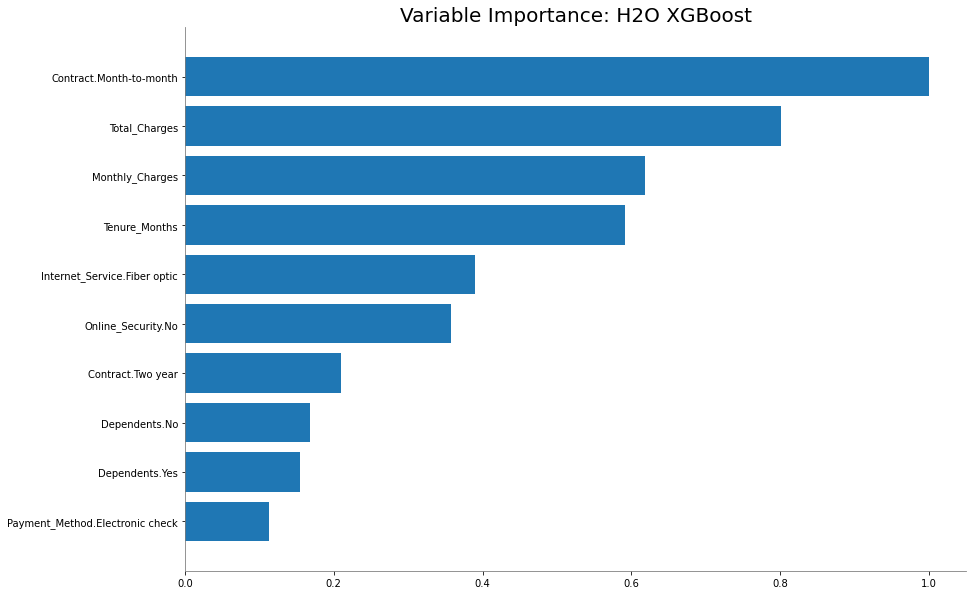

In [36]:
#Variable important plot
out.varimp_plot()

In [38]:
#Download the mojo file for deployment
aml.leader.download_mojo(path = "./")

'/content/GLM_1_AutoML_20201020_090123.zip'